<font color='red'>

Grade: A.

Good job overall!

Problem 1: Good

Problem 2: Part (c): s2_y1 should be calculated as

s2_y1=MSE*(1 + 1/n+(x_h1-x1.mean())**2/np.sum((x-x.mean())**2))

same for s2_y2.

Others are good.

Problem 3: Part (b): the theoretical value of the standard deviation of b was not calculated and compared to.

Others look good.

Problem 4: Part (c):  s2_y_h should be calculated as:

s2_y_h=MSE*(1+1/n+(x_h-x.mean())**2/np.sum((x-x.mean())**2))

Others are good.

# Programming HW 2

In [8]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from collections import Counter
import seaborn as sb
%matplotlib inline

## Problem 1

Refer to Grade point average Problem.

a. Prepare a box plot for the ACT scores $x_i$. Are there any noteworthy features in this plot?

b. Prepare a dot plot of the residuals. What information does this plot provide?

c. Plot the residual $e_i$ against the fitted values $\hat{y}_i$. What departures from normal error regression model can be studied from this plot? What are your findings?

d. Prepare a normal probability plot of the residuals. Does it appear to be a normal distribution?

1#a


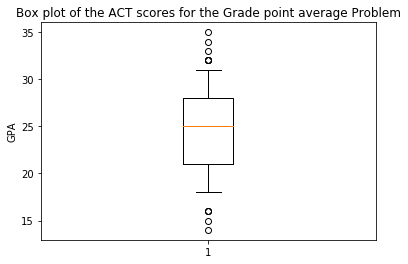


1#b


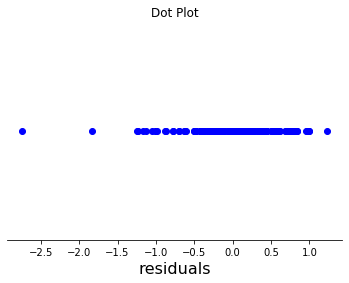

 this plot provides that every residual has only one

1#c


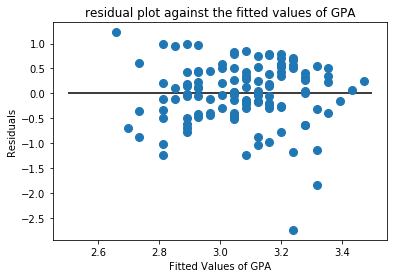

 this plot can be used to examine whether the variance of the error terms is constant, I found that the error variance is larger for higher GPA than for lower GPA
1#d


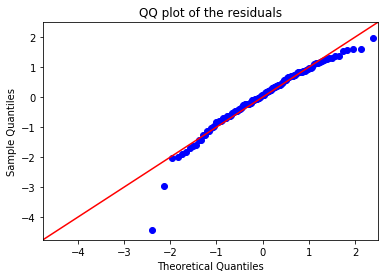

 it does not appear to be a normal distribution


In [9]:
print('1#a')
data=np.loadtxt('GPA.txt')
x=data[:,1]
plt.boxplot(x, whis=0.5)
plt.title('Box plot of the ACT scores for the Grade point average Problem')
plt.ylabel('GPA')
plt.show()
print()

print('1#b')
y=data[:,0]
x=sm.add_constant(x)
results=sm.OLS(y,x).fit()
x=data[:,1]
residuals=results.resid
y_hat=results.params[0]+results.params[1]*x

dict_ct=(Counter(residuals))

for key in dict_ct.keys():
    for j in range(dict_ct[key]):
        plt.plot(key,j+1,'o',c='b')
        
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().set_yticks([])
plt.xlabel('residuals', size=16)
plt.title('Dot Plot')
plt.show()
print(' this plot provides that every residual has only one')
print()

print('1#c')
plt.plot(y_hat,residuals,'o',markersize=8)
plt.xlabel('Fitted Values of GPA')
plt.ylabel('Residuals')
plt.title('residual plot against the fitted values of GPA')
plt.hlines(0, 2.5, 3.5)
plt.show()
print(' this plot can be used to examine whether the variance of the error terms is constant, I found that the error variance is larger for higher GPA than for lower GPA')

print('1#d')
fig= sm.qqplot(residuals, fit=True, line='45')
plt.title('QQ plot of the residuals')
plt.show()
print(' it does not appear to be a normal distribution')

## Problem 2

Refer to the SENIC data set. The average length of stay in a hospital ($y$) (Column 2) is anticipated to be related to infection risk (Column 4), available facilities and services (Column 12), and routine chest X-ray ratio (Column 6). Assume that first-order regression model is appropriate for each of the three predictor variables. 

a. Using $R^2$ as the criterion, which predictor variable accounts for the largest reduction in the variability of the average length of stay?

b. For each of the three fitted regression models, obtain the residuals and prepare a residual plot against $x$ and a normal probability plot. Is normal error linear regression model more apt in one case than in the others?

c. Obtain the fitted regression function for the relation between length of stay and infection risk after deleting cases $47$ ($x_{47} = 6.5$, $y_{47} = 19.56$) and $112$ ($x_{112} = 5.9$, $y_{112} = 17.94$). From this fitted regression function obtain separate $95$ percent prediction intervals for new $y$ observations at $x = 6.5$ and $x = 5.9$, respectively. Do observations $y_{47}$ and $y_{112}$ fall outside these prediction intervals?

2#a

R2_1= 0.284562320773181

R2_2= 0.12640721523677995

R2_3= 0.14629242667230413

 infection risk  accounts for the largest reduction in the variability of the average length of stay


2#b



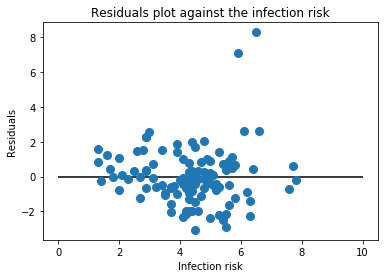

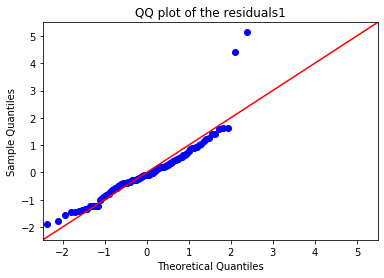

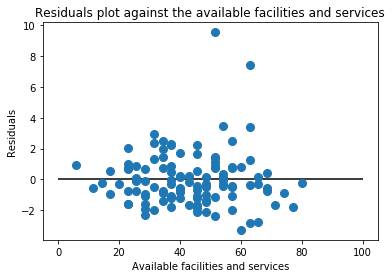

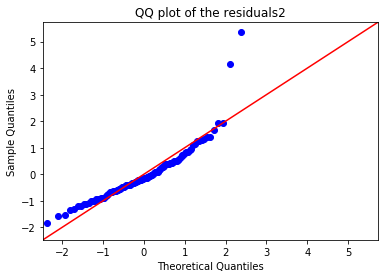

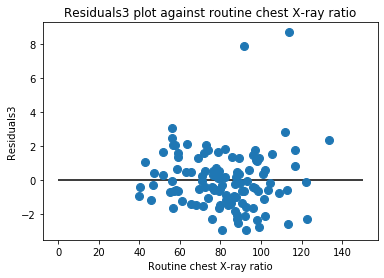

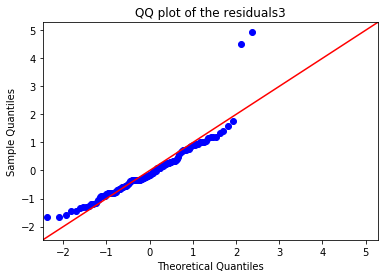


the normal error linear regression model is not more apt in one case than in the others, they are similar, and all do not appear to be a normal distribution 


2#c

The 95 percent confidence interval when x=6.5 is : [ 10.368984810221077 11.256188257926594 ]

The 95 percent confidence interval when x=5.9 is : [ 10.084241816660766 10.809233458523154 ]

𝑦47=19.56  and  𝑦112=17.94  fall outside these prediction intervals



In [10]:
print('2#a')
print( )
x= np.loadtxt('SENIC.txt',  usecols=(3,11,5), unpack=True)
y= np.loadtxt('SENIC.txt',  usecols=1,  unpack=True)

x1=x[0]
b1_1=np.sum((x1-x1.mean())*(y-y.mean()))/np.sum((x1-x1.mean())**2)
b0_1=y.mean()-b1_1*x1.mean()
y1=b0_1+b1_1*x1
SSTO1= np.sum((y-y.mean())**2)
SSR=np.sum((y1-y.mean())**2)
print('R2_1=',SSR/SSTO1)
print( )

x2=x[1]
b1_2=np.sum((x2-x2.mean())*(y-y.mean()))/np.sum((x2-x2.mean())**2)
b0_2=y.mean()-b1_2*x2.mean()
y2=b0_2+b1_2*x2
SSTO2= np.sum((y-y.mean())**2)
SSR=np.sum((y2-y.mean())**2)
print('R2_2=',SSR/SSTO2)
print( )

x3=x[2]
b1_3=np.sum((x3-x3.mean())*(y-y.mean()))/np.sum((x3-x3.mean())**2)
b0_3=y.mean()-b1_3*x3.mean()
y3=b0_3+b1_3*x3
SSTO3= np.sum((y-y.mean())**2)
SSR=np.sum((y3-y.mean())**2)
print('R2_3=',SSR/SSTO2)
print( )
print(' infection risk  accounts for the largest reduction in the variability of the average length of stay')
print( )
print( )


print('2#b')
print( )

residuals1=y-y1
plt.plot(x1,residuals1,'o',markersize=8)
plt.xlabel('Infection risk')
plt.ylabel('Residuals')
plt.title('Residuals plot against the infection risk')
plt.hlines(0, 0, 10)
plt.show()
fig= sm.qqplot(residuals1,fit=True, line='45')
plt.title('QQ plot of the residuals1')
plt.show()
print( )

residuals2=y-y2
plt.plot(x2,residuals2,'o',markersize=8)
plt.xlabel('Available facilities and services')
plt.ylabel('Residuals')
plt.title('Residuals plot against the available facilities and services')
plt.hlines(0, 0, 100)
plt.show()
fig= sm.qqplot(residuals2, fit=True,line='45')
plt.title('QQ plot of the residuals2')
plt.show()
print( )

residuals3=y-y3
plt.plot(x3,residuals3,'o',markersize=8)
plt.xlabel('Routine chest X-ray ratio')
plt.ylabel('Residuals3')
plt.title('Residuals3 plot against routine chest X-ray ratio')
plt.hlines(0, 0, 150)
plt.show()
fig= sm.qqplot(residuals3, fit=True,line='45')
plt.title('QQ plot of the residuals3')
plt.show()

print( )
print('the normal error linear regression model is not more apt in one case than in the others, they are similar, and all do not appear to be a normal distribution ' )
print( )
print( )

print('2#c')
print( )

x=np.delete(x[0],[46,111])
y=np.delete(y,[46,111])

b1=np.sum((x-x.mean())*(y-y.mean()))/np.sum((x-x.mean())**2)
b0=y.mean()-b1*x.mean()
y1=b0+b1*x

n=x.size
x_h1=6.5
y1_h1=b0+b1*x_h1
MSE=(np.sum((y-y1)**2))/(n-2)
s2_y1=MSE*(1/n+(x_h1-x1.mean())**2/np.sum((x-x.mean())**2))
s_y1 = np.sqrt(s2_y1)
print('The 95 percent confidence interval when x=6.5 is : [', y1_h1-sp.stats.t.ppf(0.975,n-2)*s_y1,y1_h1+sp.stats.t.ppf(0.975,n-2)*s_y1,']')
print()

x_h2=5.9
y1_h2=b0+b1*x_h2
MSE=(np.sum((y-y1)**2))/(n-2)
s2_y2=MSE*(1/n+(x_h2-x.mean())**2/np.sum((x-x.mean())**2))
s_y2 = np.sqrt(s2_y2)
print('The 95 percent confidence interval when x=5.9 is : [', y1_h2-sp.stats.t.ppf(0.975,n-2)*s_y2,y1_h2+sp.stats.t.ppf(0.975,n-2)*s_y2,']')
print()
print ('𝑦47=19.56  and  𝑦112=17.94  fall outside these prediction intervals') 
print()

## Problem 3

Five observations on $y$ are to be taken when $x = 4, 8, 12, 16$, and $20$, respectively. The true regression function is $E[y] = 20 + 4x$, and the $\epsilon_i$ are independent $\mathcal{N}(0, 25)$.

$$\sigma=5 $$

a. Generate five normal random numbers, with mean $0$ and variance $25$. Consider these random numbers as the error terms for the five $y$ observations at $x = 4,8, 12, 16$, and $20$ and calculate $y_1, y_2, y_3, y_4$, and $y_5$. Obtain the least squares estimates $b_0$ and $b_1$, when fitting a straight line to the five cases. Also calculate $\hat{y}_h$ when $x_h = 10$ and obtain a $95$ percent confidence interval for $E[y_h]$ when $x_h = 10$.

b. Repeat part (a) 200 times, generating new random numbers each time. Make a histogram of the 200 estimates $b_1$. Calculate the mean and standard deviation of the $200$ estimates $b_1$. Are the results consistent with theoretical expectations?

c. What proportion of the $200$ confidence intervals for $E[y_h]$ when $x_h = 10$ include $E[y_h]$? Is this result consistent with theoretical expectations?

_Hint: to generate normal random numbers, you can use the numpy.random.normal(loc=0.0, scale=1.0, size=None) function. Check the webpage of this function on more details about how to use it. To make histogram plot, you can use matplotlib.pyplot.hist(x). Please also check how to use this function correctly._

#3a

[ 36.5218858   45.98477026  58.8532374   85.15819725 108.78023197]
b1= 4.592252982910045
b0= 11.95262873996699

The 95 percent confidence interval when x=10 is : [ 47.636437501089645 68.11387963704524 ]


#3b



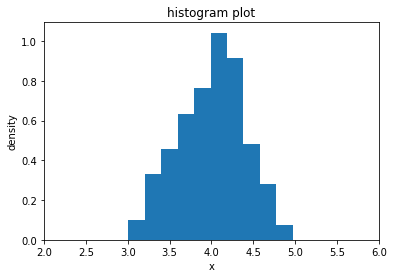

mean of b1= 3.999207282280894
standard deviation of b1= 0.39874054328936637
The results are consistent with theoretical expectations

#3c
The proportion of the 200 confidence intervals for 𝐸[𝑦ℎ] when 𝑥ℎ=10 include 𝐸[𝑦ℎ]= 0.965
The result is consistent with theoretical expectations


In [11]:
print ('#3a')
print ( )
x=np.array([4,8,12,16,20])
e=np.random.normal(loc=0.0, scale=5, size=5)
y=20+4*x+e
print(y)

b1=np.sum((x-x.mean())*(y-y.mean()))/np.sum((x-x.mean())**2)
b0=y.mean()-b1*x.mean()
print ('b1=',b1)
print ('b0=',b0)

print ( )
y_hat=b0+b1*x
x_h=10
n=x.size
y_hat_h=b0+b1*x_h
MSE=(np.sum((y-y_hat)**2))/(n-2)
s2_y_h=MSE*(1/n+(x_h-x.mean())**2/np.sum((x-x.mean())**2))
s_y_h= np.sqrt(s2_y_h)
print('The 95 percent confidence interval when x=10 is : [', y_hat_h-sp.stats.t.ppf(0.975,n-2)*s_y_h,y_hat_h+sp.stats.t.ppf(0.975,n-2)*s_y_h,']')
print()
print()

print ('#3b')
print ( )


b=np.zeros(200,)
for i in range(0,200,1): 
    x=np.array([4,8,12,16,20])
    e=np.array(np.random.normal(loc=0.0, scale=5, size=5))
    y=20+4*x+e
    b1=np.array(np.sum((x-x.mean())*(y-y.mean()))/np.sum((x-x.mean())**2))
    b[i]=b1

plt.hist(b, density=True)
plt.title('histogram plot')
plt.xlabel('x')
plt.ylabel('density')
plt.xlim(2,6)
plt.show()

print('mean of b1=', b.mean())
print('standard deviation of b1=', np.std(b))
print ('The results are consistent with theoretical expectations' )
print ( )  
       
print ('#3c')
a1 = []
for i in range(0,200,1): 
    x=np.array([4,8,12,16,20])
    e=np.array(np.random.normal(loc=0.0, scale=5, size=5))
    y=20+4*x+e
    b1=np.array(np.sum((x-x.mean())*(y-y.mean()))/np.sum((x-x.mean())**2))
    b0=y.mean()-b1*x.mean()
    y_hat=b0+b1*x
    x_h=10
    n=x.size
    y_hat_h=b0+b1*x_h
    MSE=(np.sum((y-y_hat)**2))/(n-2)
    s2_y_h=MSE*(1/n+(x_h-x.mean())**2/np.sum((x-x.mean())**2))
    s_y_h= np.sqrt(s2_y_h)
    t=sp.stats.t.ppf(0.975,n-2)*s_y_h   
    Ey=20+4*x_h
    if Ey>= (y_hat_h-t) and Ey<=(y_hat_h+t):
        a=1
    else:
        a=0
    a1.append(a)
    
    
a= np.asarray(a1) 
p=(np.sum(a)/200)
print('The proportion of the 200 confidence intervals for 𝐸[𝑦ℎ] when 𝑥ℎ=10 include 𝐸[𝑦ℎ]=',p)


print('The result is consistent with theoretical expectations')

## Problem 4

**Blood pressure**. The following data were obtained in a study of the relation between diastolic blood pressure ($y$) and age ($x$) for boys 5 to 13 years old.

| i | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
|---|---|---|---|---|---|---|---|---|
| $x_i$| 5 | 8 | 11 | 7 | 13 | 12 | 12 | 6|
| $y_i$| 63 | 67| 74 | 64 |75 | 69 | 90 | 60 |

a. Assuming normal error regression model  is appropriate, obtain the estimated regression function and plot the residuals $e_i$ against $x_i$. What does your residual plot show?

b. Omit case 7 from the data and obtain the estimated regression function based on the remaining seven cases. Compare this estimated regression function to that obtained in part (a). What can you conclude about the effect of case 7?

c. Using your fitted regression function in part (b), obtain a $99$ percent prediction interval for a new $y$ observation at $x = 12$. Does observation $y_7$ fall outside this prediction interval?

#4a

b1= 2.3333333333333335
b0= 48.666666666666664


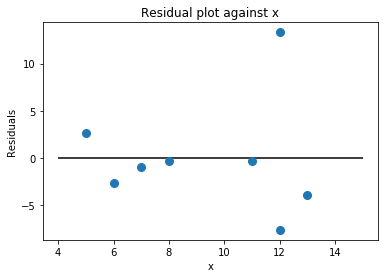

The residual plot show that the error variance is larger for older boys than for younger boys


#4b

b1= 1.6213592233009706
b0= 53.067961165048544

We can conclude that case 7 caused a shift in the fitted regression line as to lead to a systematic  pattern of deviations from the fitted line for the other observations.

#4c

The 99 percent confidence interval when x=12 is : [ 66.57887186048288 78.4696718288375 ]

𝑦=90 fall outside these prediction intervals


In [12]:
print ('#4a')
print ( )
x=np.array([5,8,11,7,13,12,12,6])
y=np.array([63,67,74,64,75,69,90,60])
b1=np.sum((x-x.mean())*(y-y.mean()))/np.sum((x-x.mean())**2)
b0=y.mean()-b1*x.mean()
print ('b1=',b1)
print ('b0=',b0)
y_hat=b0+b1*x
residuals=y-y_hat
plt.plot(x,residuals,'o',markersize=8)
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual plot against x')
plt.hlines(0,4,15)
plt.show()
print ('The residual plot show that the error variance is larger for older boys than for younger boys')
print ( )
print ( )

print ('#4b')
print ( )
x1 = x.tolist()
x1.remove(12) 
x= np.asarray(x1)

y1 = y.tolist()
y1.remove(90) 
y= np.asarray(y1)

b1=np.sum((x-x.mean())*(y-y.mean()))/np.sum((x-x.mean())**2)
b0=y.mean()-b1*x.mean()
print ('b1=',b1)
print ('b0=',b0)
y_hat=b0+b1*x
print ( )
print ('We can conclude that case 7 caused a shift in the fitted regression line as to lead to a systematic  pattern of deviations from the fitted line for the other observations.' )
print ( )

print ('#4c')
print ( )
x_h=12
n=x.size
y_hat_h=b0+b1*x_h
MSE=(np.sum((y-y_hat)**2))/(n-2)
s2_y_h=MSE*(1/n+(x_h-x.mean())**2/np.sum((x-x.mean())**2))
s_y_h= np.sqrt(s2_y_h)
print('The 99 percent confidence interval when x=12 is : [', y_hat_h-sp.stats.t.ppf(0.995,n-2)*s_y_h,y_hat_h+sp.stats.t.ppf(0.995,n-2)*s_y_h,']')
print()
print ('𝑦=90 fall outside these prediction intervals') 